In [1]:
import networkx as nx

In [87]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd

In [5]:
transacciones = pd.read_csv (r'resultadoTRM1/DF_TRANSACCIONES_cop.csv', engine='python', encoding = "ISO-8859-1", sep=',')

In [6]:
transacciones

,Unnamed: 0,idComprador,idVendedor,cantidadTransaccion,precioTransaccion,fechaPulso,ciclo,importe
0,0,34,36,5084.660801,2977.099616,36,1.0,1.513754e+07
1,1,8,36,125189.463496,2977.099616,36,1.0,3.727015e+08
2,2,30,36,92790.736065,2977.099616,36,1.0,2.762473e+08
3,3,40,36,4247.214614,2977.099616,36,1.0,1.264438e+07
4,4,93,36,5752.684497,2977.099616,36,1.0,1.712631e+07
...,...,...,...,...,...,...,...,...
736746,736746,15729,584,71141.749337,1929.469029,157,4.0,1.372658e+08
736747,736747,14230,584,2667.510608,1929.469029,157,4.0,5.146879e+06
736748,736748,2562,584,12015.302668,1929.469029,157,4.0,2.318315e+07
736749,736749,14262,584,438166.021326,1929.469029,157,4.0,8.454278e+08


In [11]:
res_graf=transacciones.groupby(['idComprador','idVendedor'])[['fechaPulso']].count().reset_index()

In [12]:
res_graf

,idComprador,idVendedor,fechaPulso
0,2,36,1
1,4,7,1
2,4,89,1
3,5,23,2
4,5,35,1
...,...,...,...
15232,19767,584,1
15233,19769,584,1
15234,19770,584,1
15235,19779,584,1


In [36]:
res_graf['fechaPulso'].describe()

count    15237.000000
mean        48.352760
std         53.815308
min          1.000000
25%          6.000000
50%         30.000000
75%         71.000000
max        274.000000
Name: fechaPulso, dtype: float64

In [34]:
#res_graf_val=res_graf[res_graf['fechaPulso']>100]
res_graf_val=res_graf

In [37]:
G=nx.from_pandas_edgelist(res_graf_val, source='idVendedor',target='idComprador', edge_attr='fechaPulso')

In [1]:
##nx.draw(G)

In [28]:
import matplotlib.pyplot as plt

In [48]:
res_graf_val=res_graf[res_graf['fechaPulso']>100]

In [49]:
G=nx.from_pandas_edgelist(res_graf_val, source='idVendedor',target='idComprador', edge_attr='fechaPulso')

In [2]:
##plt.figure(1,figsize=(200,200))
##nx.draw(G,node_size=1,font_size=8)

#### Vendores VS compradores

In [3]:
estadoAgentes = pd.read_csv (r'resultadoTRM2/df_estadoAgentes.csv', engine='python', encoding = "ISO-8859-1", sep=',')

In [4]:
estadoAgentes

,Unnamed: 0,id,TIPO,edad,capital,stockProducto,val_stock,val_empresa,pulso,ciclo
0,0,3,Comprador,0,3.254783e+08,36846.000000,1.421725e+08,4.627407e+16,35,1
1,1,4,Comprador,0,5.302443e+08,318351.000000,1.228376e+09,6.513396e+17,35,1
2,2,5,Comprador,0,9.301550e+07,407056.000000,1.570650e+09,1.460948e+17,35,1
3,3,6,Comprador,0,5.728199e+08,580999.000000,2.241820e+09,1.284159e+18,35,1
4,4,7,Comprador,0,6.228840e+08,668409.000000,2.579096e+09,1.606478e+18,35,1
...,...,...,...,...,...,...,...,...,...,...
1003856,255,23537,Vendedor,1,2.962219e+08,214197.739289,6.112911e+08,9.075130e+08,230,3
1003857,256,23541,Vendedor,1,1.231781e+07,189765.479287,5.415647e+08,5.538826e+08,230,3
1003858,257,23542,Vendedor,1,1.739723e+08,719600.695690,2.053642e+09,2.227614e+09,230,3
1003859,258,23545,Vendedor,1,2.192640e+08,695238.185117,1.984115e+09,2.203379e+09,230,3


In [10]:
estadoAgentes=estadoAgentes[estadoAgentes['ciclo']==1]

<AxesSubplot:xlabel='pulso'>

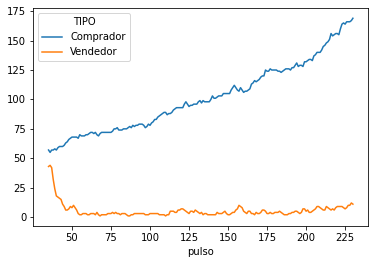

In [11]:
pd.crosstab(estadoAgentes['pulso'],estadoAgentes['TIPO']).plot()

### Sistema sin rol

In [12]:
estadoAgentes = pd.read_csv (r'resultadoTRM3/df_estadoAgentes.csv', engine='python', encoding = "ISO-8859-1", sep=',')

<AxesSubplot:xlabel='pulso'>

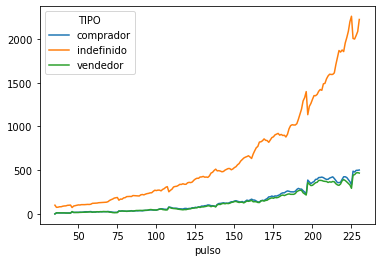

In [13]:
pd.crosstab(estadoAgentes['pulso'],estadoAgentes['TIPO']).plot()

In [14]:
estadoAgentes=estadoAgentes[estadoAgentes['ciclo']==1]

<AxesSubplot:xlabel='pulso'>

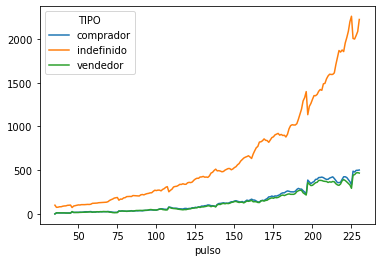

In [15]:
pd.crosstab(estadoAgentes['pulso'],estadoAgentes['TIPO']).plot()

In [16]:
estadoAgentes=estadoAgentes[estadoAgentes['TIPO']!='indefinido']

<AxesSubplot:xlabel='pulso'>

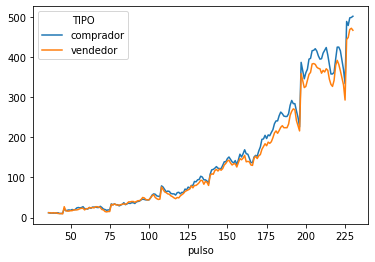

In [17]:
pd.crosstab(estadoAgentes['pulso'],estadoAgentes['TIPO']).plot()

### Fuentes de información más leidas

### Sistema multiagente 2

In [66]:
transacciones = pd.read_csv (r'resultadoTRM3/DF_TRANSACCIONES_cop.csv', engine='python', encoding = "ISO-8859-1", sep=',')

In [67]:
transacciones

,Unnamed: 0,idComprador,idVendedor,cantidadTransaccion,precioTransaccion,fechaPulso,ciclo,importe
0,0,77,29,1.834495e+04,3858.560000,36,1.0,7.078511e+07
1,1,90,29,7.198436e+03,3858.560000,36,1.0,2.777560e+07
2,2,14,29,1.641607e+03,3858.560000,36,1.0,6.334240e+06
3,3,43,29,4.116574e+04,3858.560000,36,1.0,1.588405e+08
4,4,58,29,9.271554e+03,3858.560000,36,1.0,3.577485e+07
...,...,...,...,...,...,...,...,...
32768,32768,2649,515,3.869017e-06,7473.932631,230,1.0,2.891677e-02
32769,32769,2667,2468,9.236649e-11,7473.932631,230,1.0,6.903409e-07
32770,32770,3529,1483,1.117330e+01,7473.932631,230,1.0,8.350847e+04
32771,32771,3201,3587,1.853594e-15,7473.932631,230,1.0,1.385364e-11


In [63]:
res_graf=transacciones.groupby(['idComprador','idVendedor'])[['fechaPulso']].count().reset_index()

In [64]:
res_graf

,idComprador,idVendedor,fechaPulso
0,10,8,1
1,10,12,1
2,10,31,1
3,10,78,1
4,10,130,1
...,...,...,...
30033,3957,3774,1
30034,3958,3830,1
30035,3966,3211,1
30036,3970,3940,1


In [65]:
res_graf['fechaPulso'].describe()

count    30038.000000
mean         1.091051
std          0.341451
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: fechaPulso, dtype: float64

In [68]:
res_graf_val=res_graf[res_graf['fechaPulso']>100]
res_graf_val=res_graf

In [69]:
G=nx.from_pandas_edgelist(res_graf_val, source='idVendedor',target='idComprador', edge_attr='fechaPulso')

In [4]:
##plt.figure(1,figsize=(200,200))
##nx.draw(G,node_size=1,font_size=8)

In [28]:
import matplotlib.pyplot as plt

In [72]:
from collections import Counter

In [73]:
contarFreq=(Counter((list(res_graf['idComprador'].values)+list(res_graf['idVendedor'].values))))

In [76]:
contarFreq=pd.DataFrame.from_dict(contarFreq, orient='index').reset_index().sort_values(0, ascending=False)

In [99]:
seleccionados=list(contarFreq.head(200)[0].values)
#seleccionados

In [100]:
res_graf_val=res_graf[(res_graf['idComprador'].isin(seleccionados))|(res_graf['idVendedor'].isin(seleccionados))]

In [101]:
G=nx.from_pandas_edgelist(res_graf_val, source='idVendedor',target='idComprador', edge_attr='fechaPulso')

In [3]:
##plt.figure(1,figsize=(100,100))
##nx.draw(G,node_size=200,font_size=8)

In [20]:
import pyvis

In [22]:
from pyvis.network import Network

In [25]:
net=Network(notebook=True)

In [26]:
net.from_nx(G)